C:\Users\bathi\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - loss: 0.0857 - val_loss: 0.0012
Epoch 2/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0073 - val_loss: 6.0873e-04
Epoch 3/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0039 - val_loss: 5.1540e-04
Epoch 4/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0033 - val_loss: 0.0014
Epoch 5/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0027 - val_loss: 4.7695e-04
Epoch 6/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0024 - val_loss: 0.0014
Epoch 7/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0022 - val_loss: 6.2783e-04
Epoch 8/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0021 - val_loss: 0.0039
Epoch 9/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0019 - val_loss: 3.4503e-04
Epoch 10/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0017 - val_loss: 6.5562e-04
Epoch 11/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0015 - val_loss: 4.2794e-04
Epoch 12/20
86/86 ━━━━━━━━━━━━━━━━

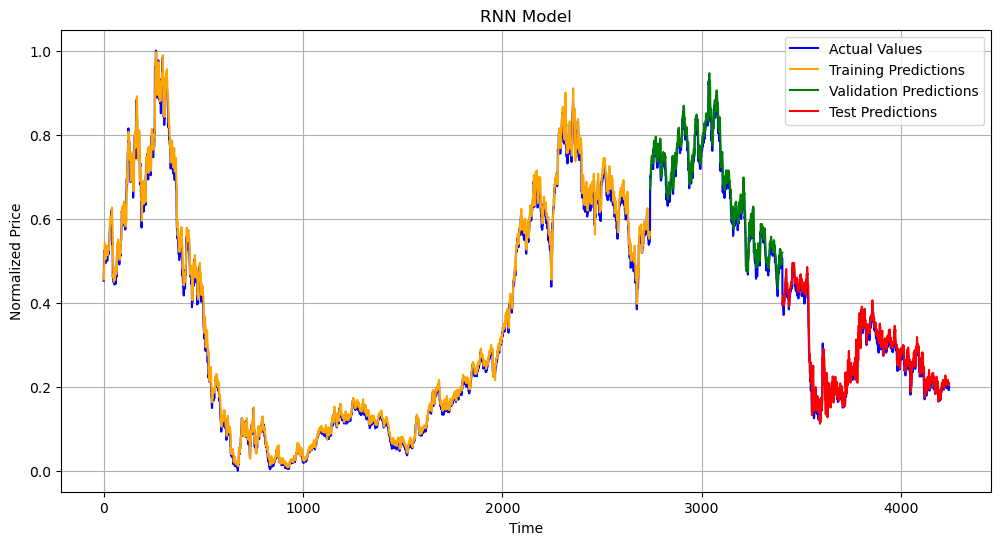

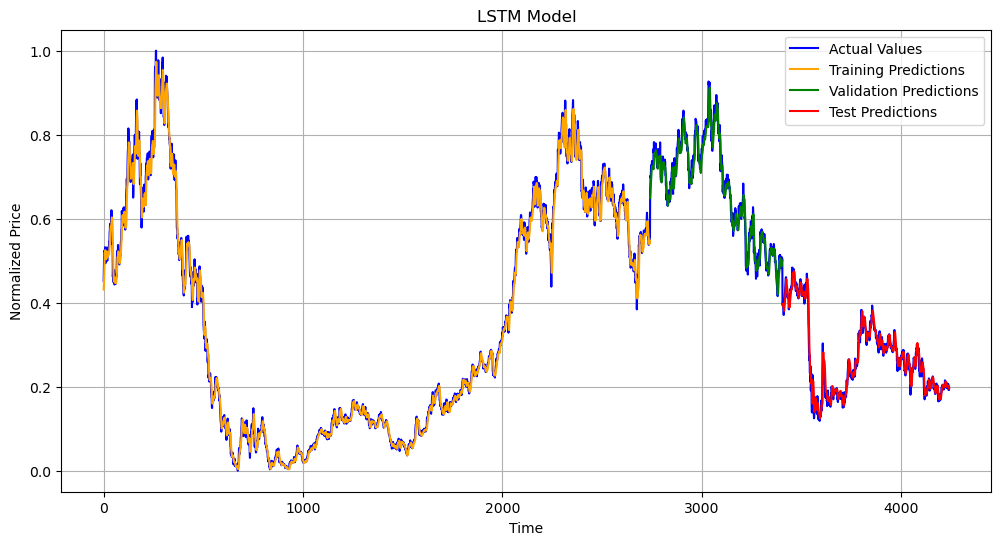

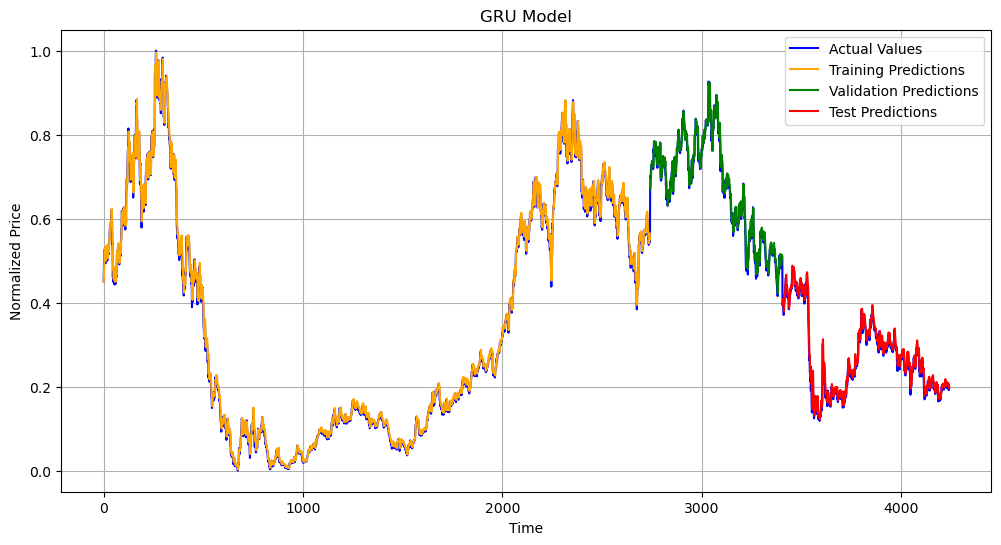

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, LSTM, GRU

# Load the dataset
data = pd.read_csv("C:/Users/bathi/Downloads/AAL.csv")

# Select relevant columns and scale data
columns_to_scale = ['Open', 'High', 'Low', 'Close', 'Volume']
scaler = MinMaxScaler()
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

# Split the dataset
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

# Further split training data into training and validation sets
validation_split = 0.2
X_train_val, X_val, y_train_val, y_val = train_test_split(
    train_data[columns_to_scale],
    train_data['Close'],
    test_size=validation_split,
    shuffle=False
)

X_test = test_data[columns_to_scale]
y_test = test_data['Close']

# Preprocessing function
def preprocess_data(X, y, past_days):
    X_seq, y_seq = [], []
    for i in range(past_days, len(X)):
        X_seq.append(X.iloc[i-past_days:i].values)
        y_seq.append(y.iloc[i])
    return np.array(X_seq), np.array(y_seq)

# Parameters
past_days = 30

# Preprocess training, validation, and test data
X_train, y_train = preprocess_data(X_train_val, y_train_val, past_days)
X_val, y_val = preprocess_data(X_val, y_val, past_days)
X_test, y_test = preprocess_data(X_test, y_test, past_days)

# Build and train RNN
rnn_model = Sequential([
    SimpleRNN(50, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    Dense(1)
])
rnn_model.compile(optimizer='adam', loss='mean_squared_error')
rnn_history = rnn_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32, verbose=1)

# Predictions for RNN
rnn_predictions = rnn_model.predict(X_test).flatten()

# Build and train LSTM
lstm_model = Sequential([
    LSTM(50, activation='tanh', recurrent_activation='sigmoid', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_history = lstm_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32, verbose=1)

# Predictions for LSTM
lstm_predictions = lstm_model.predict(X_test).flatten()

# Build and train GRU
gru_model = Sequential([
    GRU(50, activation='tanh', recurrent_activation='sigmoid', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    Dense(1)
])
gru_model.compile(optimizer='adam', loss='mean_squared_error')
gru_history = gru_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32, verbose=1)

# Predictions for GRU
gru_predictions = gru_model.predict(X_test).flatten()

# Enhanced plot function with proper sequence alignment
def plot_model_results(title, y_train, y_val, y_test, train_predictions, val_predictions, test_predictions):
    plt.figure(figsize=(12, 6))

    # Concatenate all data for smooth plotting
    full_actual = np.concatenate([y_train, y_val, y_test])
    full_predictions = np.concatenate([train_predictions, val_predictions, test_predictions])

    plt.plot(full_actual, label='Actual Values', color='blue')
    plt.plot(range(len(y_train)), train_predictions, label='Training Predictions', color='orange')
    plt.plot(range(len(y_train), len(y_train) + len(y_val)), val_predictions, label='Validation Predictions', color='green')
    plt.plot(range(len(y_train) + len(y_val), len(y_train) + len(y_val) + len(y_test)), test_predictions, label='Test Predictions', color='red')

    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Normalized Price')
    plt.legend()
    plt.grid()
    plt.show()

# Generate predictions for training and validation
rnn_train_predictions = rnn_model.predict(X_train).flatten()
rnn_val_predictions = rnn_model.predict(X_val).flatten()
lstm_train_predictions = lstm_model.predict(X_train).flatten()
lstm_val_predictions = lstm_model.predict(X_val).flatten()
gru_train_predictions = gru_model.predict(X_train).flatten()
gru_val_predictions = gru_model.predict(X_val).flatten()

# Plot individual results
plot_model_results('RNN Model', y_train, y_val, y_test, rnn_train_predictions, rnn_val_predictions, rnn_predictions)
plot_model_results('LSTM Model', y_train, y_val, y_test, lstm_train_predictions, lstm_val_predictions, lstm_predictions)
plot_model_results('GRU Model', y_train, y_val, y_test, gru_train_predictions, gru_val_predictions, gru_predictions)

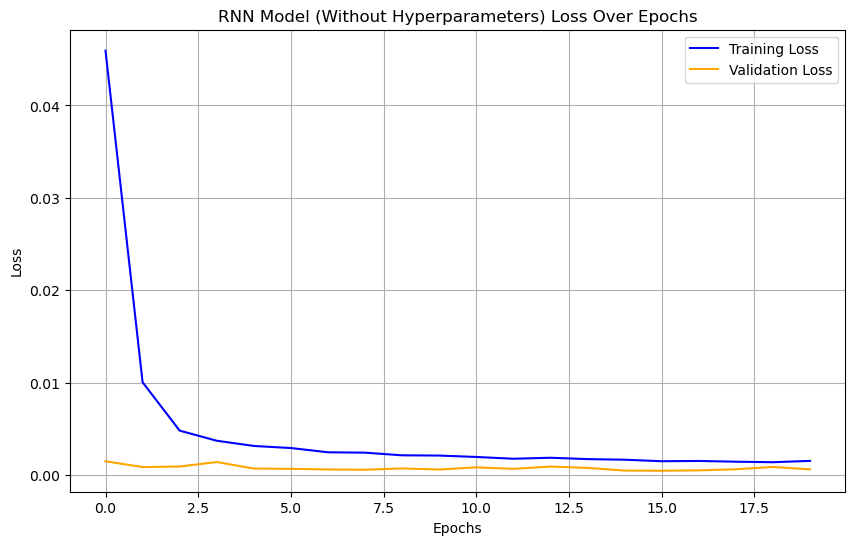

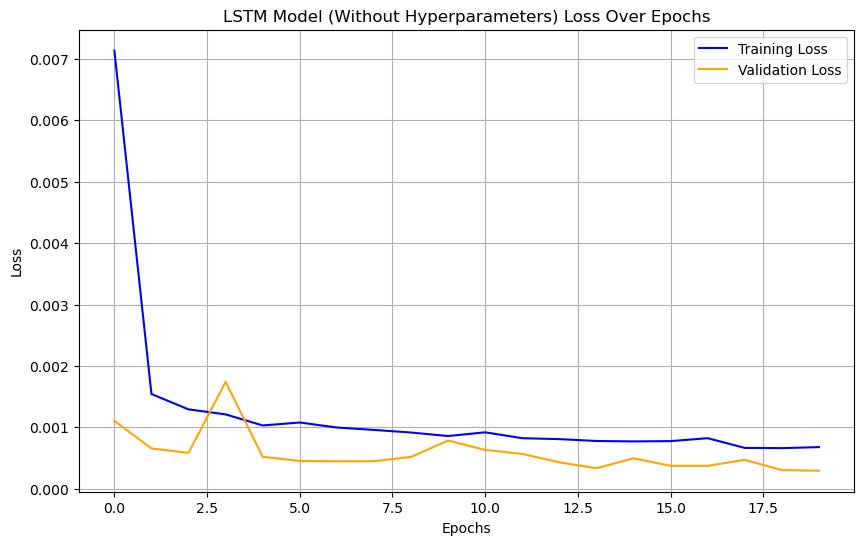

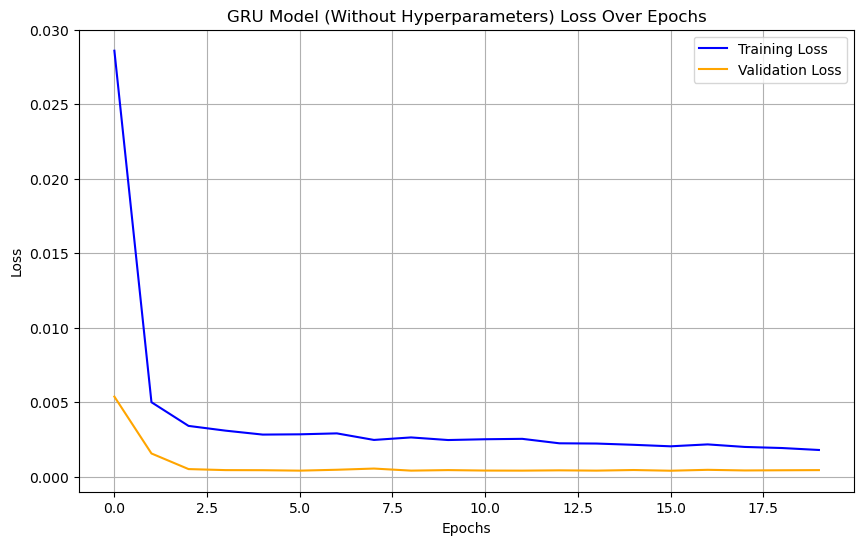

In [101]:
def plot_loss(history, title):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss', color='blue')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
    plt.title(f'{title} Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    plt.show()

# Plot losses for RNN, LSTM, and GRU
plot_loss(rnn_history, 'RNN Model (Without Hyperparameters)')
plot_loss(lstm_history, 'LSTM Model (Without Hyperparameters)')
plot_loss(gru_history, 'GRU Model (Without Hyperparameters)')


Metrics for Normal Models:
  Model       MSE      RMSE      MAPE        R²  Accuracy
0   RNN  0.000332  0.018229  5.569952  0.958769  0.944300
1  LSTM  0.000272  0.016495  5.086793  0.966239  0.949132
2   GRU  0.000519  0.022786  7.072439  0.935574  0.929276


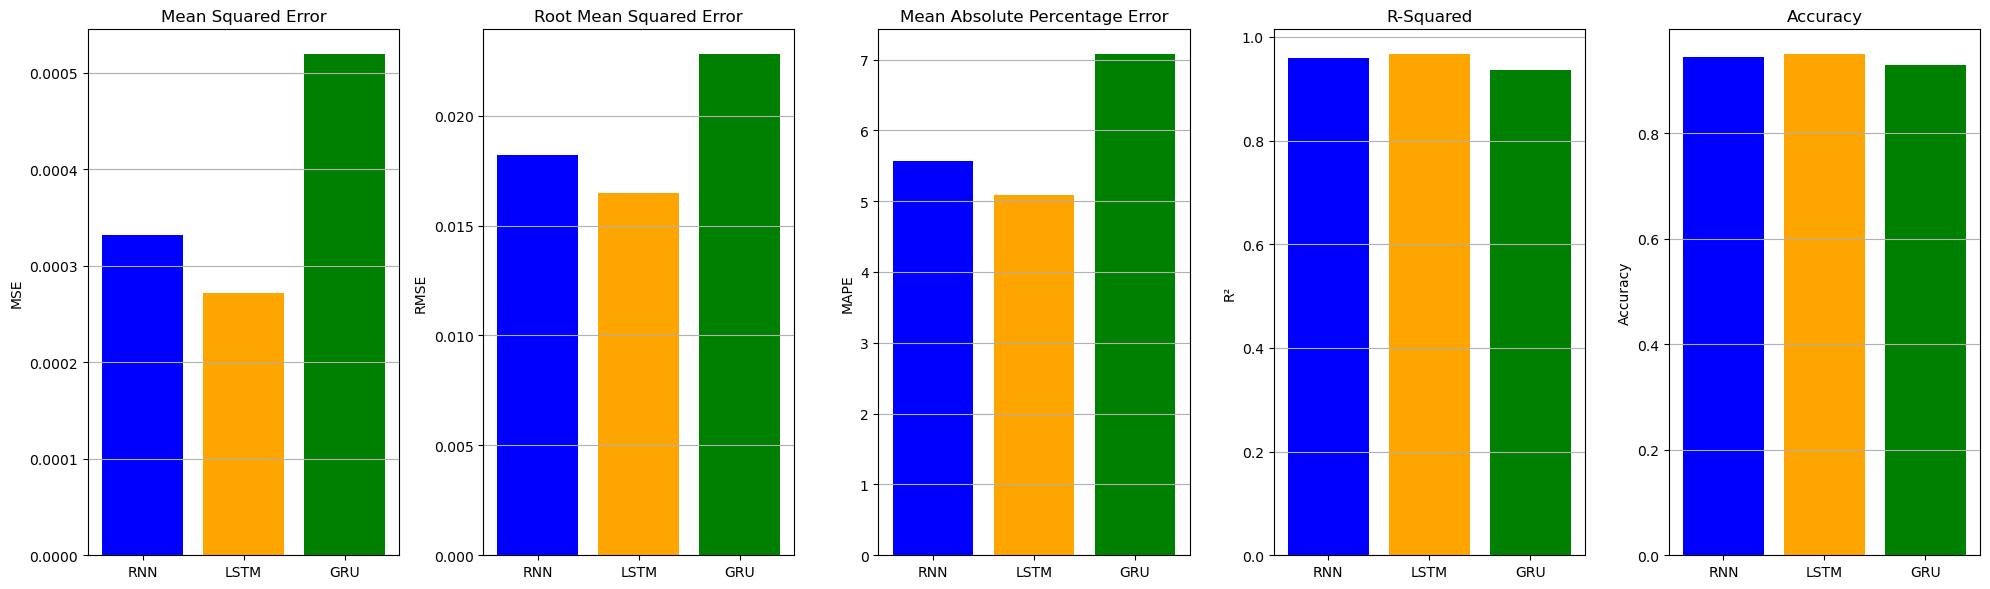

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Calculate metrics
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true.flatten(), y_pred.flatten())
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true.flatten() - y_pred.flatten()) / y_true.flatten())) * 100
    r2 = r2_score(y_true.flatten(), y_pred.flatten())
    accuracy = 1 - (mape / 100)  # Approximate accuracy derived from MAPE
    return mse, rmse, mape, r2, accuracy

# Metrics for Normal Models (no tuning)
rnn_mse, rnn_rmse, rnn_mape, rnn_r2, rnn_accuracy = calculate_metrics(y_test, rnn_predictions)
lstm_mse, lstm_rmse, lstm_mape, lstm_r2, lstm_accuracy = calculate_metrics(y_test, lstm_predictions)
gru_mse, gru_rmse, gru_mape, gru_r2, gru_accuracy = calculate_metrics(y_test, gru_predictions)

# Display metrics
metrics_normal = {
    'Model': ['RNN', 'LSTM', 'GRU'],
    'MSE': [rnn_mse, lstm_mse, gru_mse],
    'RMSE': [rnn_rmse, lstm_rmse, gru_rmse],
    'MAPE': [rnn_mape, lstm_mape, gru_mape],
    'R²': [rnn_r2, lstm_r2, gru_r2],
    'Accuracy': [rnn_accuracy, lstm_accuracy, gru_accuracy]
}
metrics_normal_df = pd.DataFrame(metrics_normal)

print("Metrics for Normal Models:")
print(metrics_normal_df)

# Plot metrics for normal models side by side
fig, axes = plt.subplots(1, 5, figsize=(20, 6), sharey=False)

# Metric Titles and Data
metrics_list = ['MSE', 'RMSE', 'MAPE', 'R²', 'Accuracy']
titles = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Percentage Error', 'R-Squared', 'Accuracy']

# Plot each metric
for i, (metric, title) in enumerate(zip(metrics_list, titles)):
    axes[i].bar(metrics_normal['Model'], metrics_normal[metric], color=['blue', 'orange', 'green'])
    axes[i].set_title(title)
    axes[i].set_ylabel(metric)
    axes[i].grid(axis='y')

plt.tight_layout()
plt.show()


C:\Users\bathi\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - loss: 0.0459 - val_loss: 0.0010
Epoch 2/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0058 - val_loss: 5.5939e-04
Epoch 3/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0039 - val_loss: 0.0023
Epoch 4/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0025 - val_loss: 4.9340e-04
Epoch 5/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0021 - val_loss: 7.1334e-04
Epoch 6/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0018 - val_loss: 4.7610e-04
Epoch 7/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0017 - val_loss: 6.8390e-04
Epoch 8/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0018 - val_loss: 3.5462e-04
Epoch 9/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0015 - val_loss: 4.1746e-04
Epoch 10/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0016 - val_loss: 0.0010
Epoch 11/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0014 - val_loss: 3.7712e-04
Epoch 12/20
86/86 ━━━━━━━━━━━━━

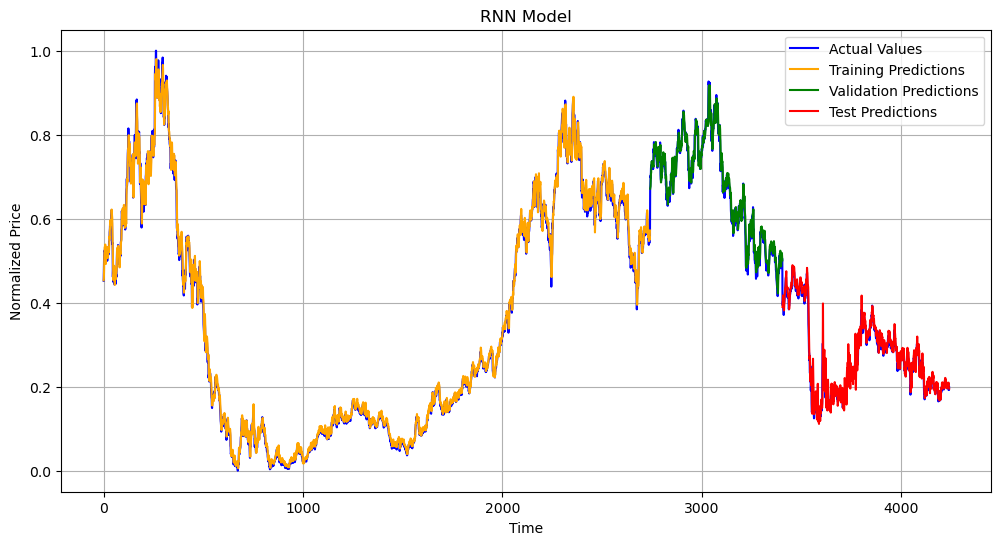

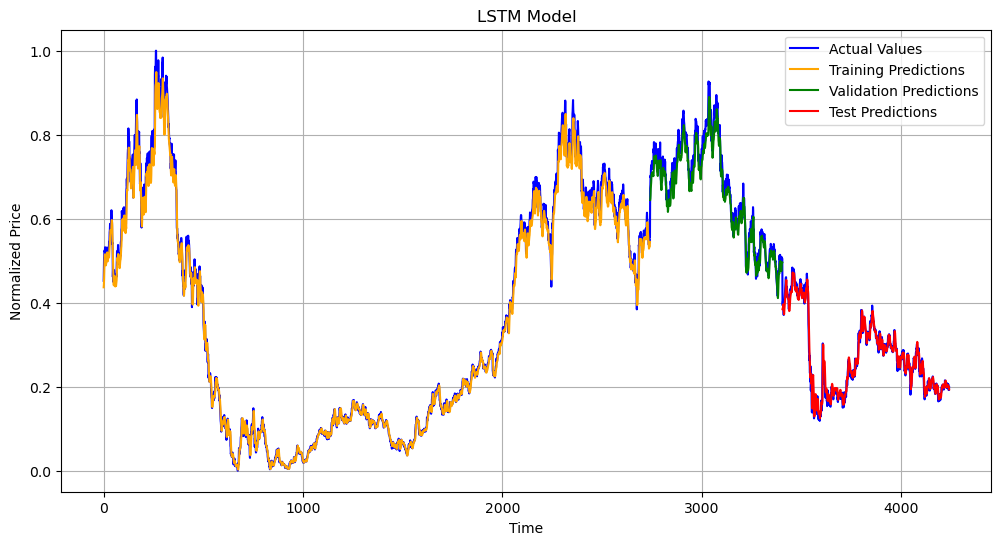

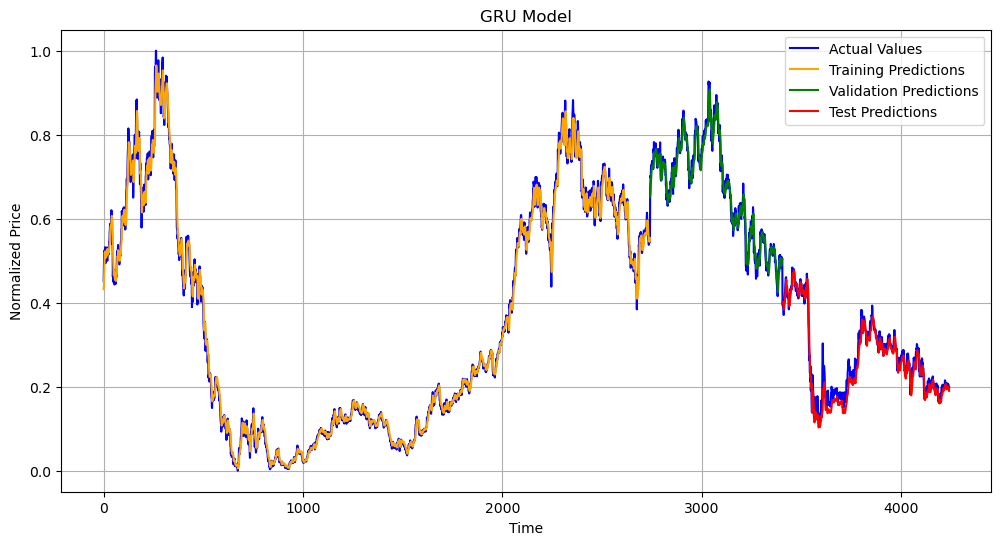

In [112]:
from tensorflow.keras.optimizers import SGD
# Best hyperparameters from tuning
best_params_rnn = {'units': 50, 'learning_rate': 0.01, 'optimizer': 'adam', 'epochs': 20, 'batch_size': 32}
best_params_lstm = {'units': 100, 'learning_rate': 0.001, 'optimizer': 'adam', 'epochs': 20, 'batch_size': 16}
best_params_gru = {'units': 100, 'learning_rate': 0.01, 'optimizer': 'sgd', 'epochs': 20, 'batch_size': 32}

# Build and train RNN
rnn_model = Sequential([
    SimpleRNN(best_params_rnn['units'], activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    Dense(1)
])
rnn_model.compile(optimizer=best_params_rnn['optimizer'], loss='mean_squared_error')
rnn_his = rnn_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=best_params_rnn['epochs'], batch_size=best_params_rnn['batch_size'], verbose=1)
rnn_test_predictions = rnn_model.predict(X_test).flatten()

# Build and train LSTM
lstm_model = Sequential([
    LSTM(best_params_lstm['units'], activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    Dense(1)
])
lstm_model.compile(optimizer=best_params_lstm['optimizer'], loss='mean_squared_error')
lstm_his = lstm_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=best_params_lstm['epochs'], batch_size=best_params_lstm['batch_size'], verbose=1)
lstm_test_predictions = lstm_model.predict(X_test).flatten()

# Build and train GRU
gru_model = Sequential([
    GRU(best_params_gru['units'], activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    Dense(1)
])
gru_model.compile(optimizer=SGD(learning_rate=best_params_gru['learning_rate']), loss='mean_squared_error')
gru_his = gru_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=best_params_gru['epochs'], batch_size=best_params_gru['batch_size'], verbose=1)
gru_test_predictions = gru_model.predict(X_test).flatten()

# Enhanced plot function with proper sequence alignment
def plot_model_results(title, y_train, y_val, y_test, train_predictions, val_predictions, test_predictions):
    plt.figure(figsize=(12, 6))

    # Concatenate all data for smooth plotting
    full_actual = np.concatenate([y_train, y_val, y_test])
    full_predictions = np.concatenate([train_predictions, val_predictions, test_predictions])

    plt.plot(full_actual, label='Actual Values', color='blue')
    plt.plot(range(len(y_train)), train_predictions, label='Training Predictions', color='orange')
    plt.plot(range(len(y_train), len(y_train) + len(y_val)), val_predictions, label='Validation Predictions', color='green')
    plt.plot(range(len(y_train) + len(y_val), len(y_train) + len(y_val) + len(y_test)), test_predictions, label='Test Predictions', color='red')

    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Normalized Price')
    plt.legend()
    plt.grid()
    plt.show()

# Generate predictions for training and validation
rnn_train_predictions = rnn_model.predict(X_train).flatten()
rnn_val_predictions = rnn_model.predict(X_val).flatten()
lstm_train_predictions = lstm_model.predict(X_train).flatten()
lstm_val_predictions = lstm_model.predict(X_val).flatten()
gru_train_predictions = gru_model.predict(X_train).flatten()
gru_val_predictions = gru_model.predict(X_val).flatten()

# Plot individual results
plot_model_results('RNN Model', y_train, y_val, y_test, rnn_train_predictions, rnn_val_predictions, rnn_test_predictions)
plot_model_results('LSTM Model', y_train, y_val, y_test, lstm_train_predictions, lstm_val_predictions, lstm_test_predictions)
plot_model_results('GRU Model', y_train, y_val, y_test, gru_train_predictions, gru_val_predictions, gru_test_predictions)


Metrics for Tuned Models:
          Model       MSE      RMSE      MAPE        R²  Accuracy
0   RNN (Tuned)  0.000315  0.017737  5.280434  0.960963  0.947196
1  LSTM (Tuned)  0.000235  0.015328  4.677002  0.970847  0.953230
2   GRU (Tuned)  0.000468  0.021635  6.828265  0.941918  0.931717


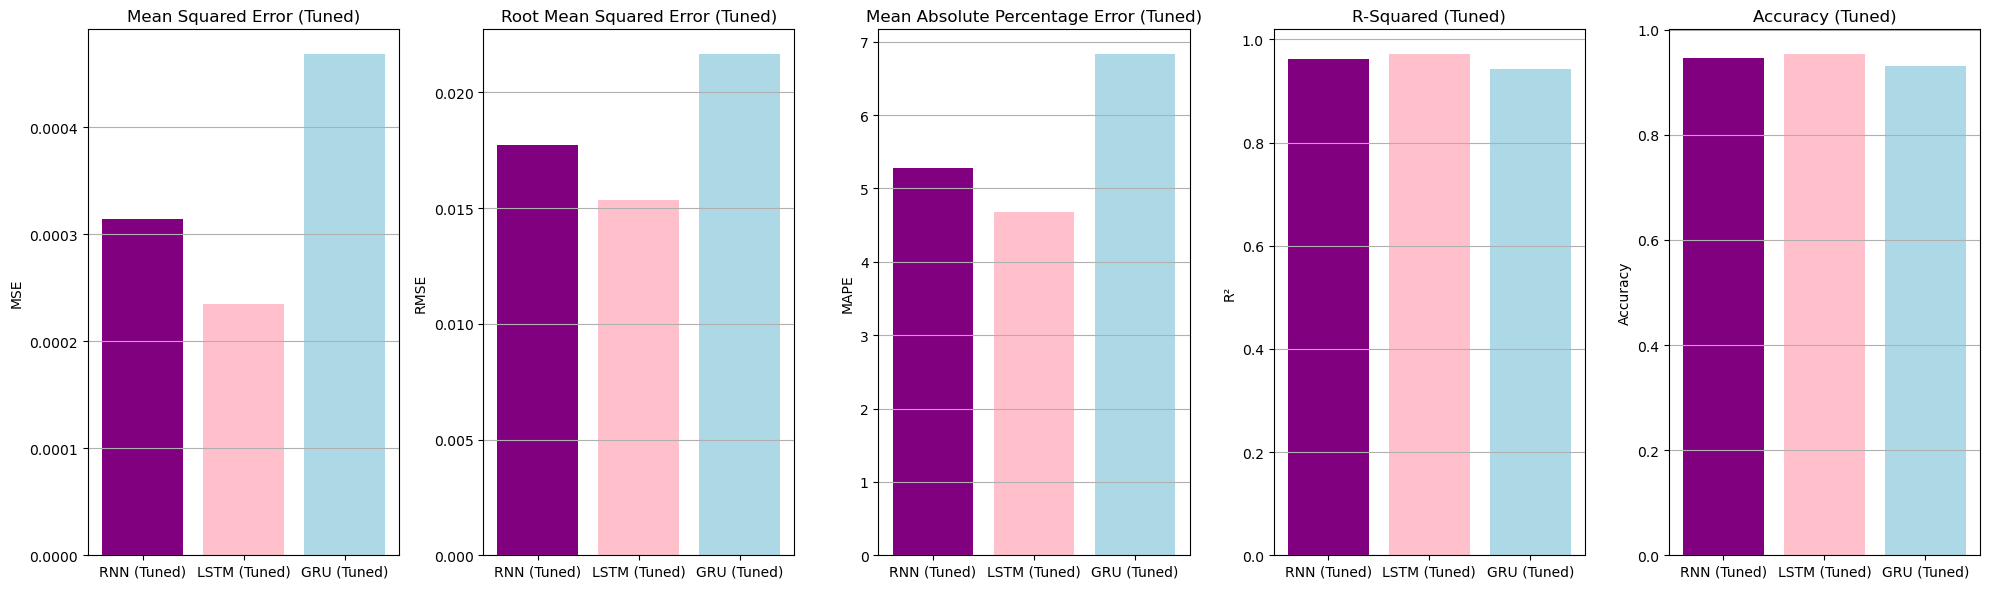

In [118]:
# Metrics for Tuned Models
rnn_mse_tuned, rnn_rmse_tuned, rnn_mape_tuned, rnn_r2_tuned, rnn_accuracy_tuned = calculate_metrics(y_test, rnn_test_predictions)
lstm_mse_tuned, lstm_rmse_tuned, lstm_mape_tuned, lstm_r2_tuned, lstm_accuracy_tuned = calculate_metrics(y_test, lstm_test_predictions)
gru_mse_tuned, gru_rmse_tuned, gru_mape_tuned, gru_r2_tuned, gru_accuracy_tuned = calculate_metrics(y_test, gru_test_predictions)

# Display metrics for tuned models
metrics_tuned = {
    'Model': ['RNN (Tuned)', 'LSTM (Tuned)', 'GRU (Tuned)'],
    'MSE': [rnn_mse_tuned, lstm_mse_tuned, gru_mse_tuned],
    'RMSE': [rnn_rmse_tuned, lstm_rmse_tuned, gru_rmse_tuned],
    'MAPE': [rnn_mape_tuned, lstm_mape_tuned, gru_mape_tuned],
    'R²': [rnn_r2_tuned, lstm_r2_tuned, gru_r2_tuned],
    'Accuracy': [rnn_accuracy_tuned, lstm_accuracy_tuned, gru_accuracy_tuned]
}
metrics_tuned_df = pd.DataFrame(metrics_tuned)

print("Metrics for Tuned Models:")
print(metrics_tuned_df)

# Plot metrics for tuned models side by side
fig, axes = plt.subplots(1, 5, figsize=(20, 6), sharey=False)

# Metric Titles and Data
metrics_list = ['MSE', 'RMSE', 'MAPE', 'R²', 'Accuracy']
titles = ['Mean Squared Error (Tuned)', 'Root Mean Squared Error (Tuned)',
          'Mean Absolute Percentage Error (Tuned)', 'R-Squared (Tuned)', 'Accuracy (Tuned)']

# Plot each metric
for i, (metric, title) in enumerate(zip(metrics_list, titles)):
    axes[i].bar(metrics_tuned['Model'], metrics_tuned[metric], color=['purple', 'pink', 'lightblue'])
    axes[i].set_title(title)
    axes[i].set_ylabel(metric)
    axes[i].grid(axis='y')

plt.tight_layout()
plt.show()


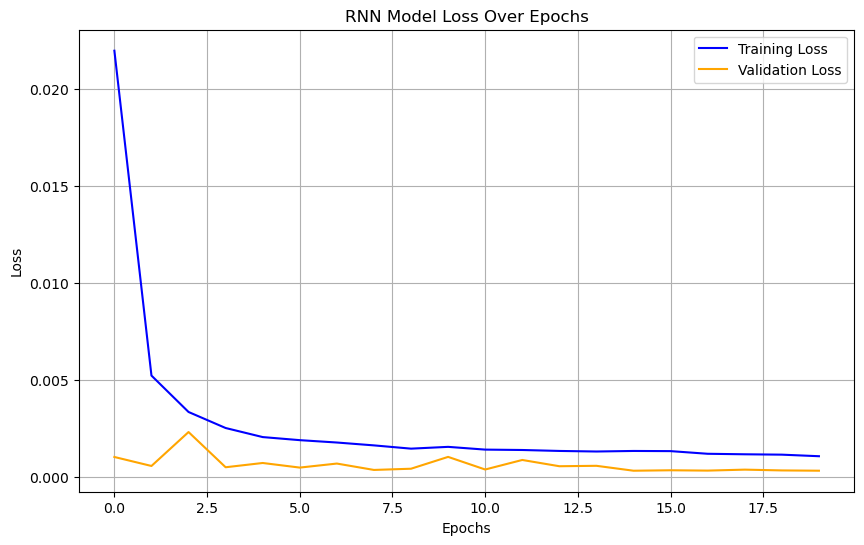

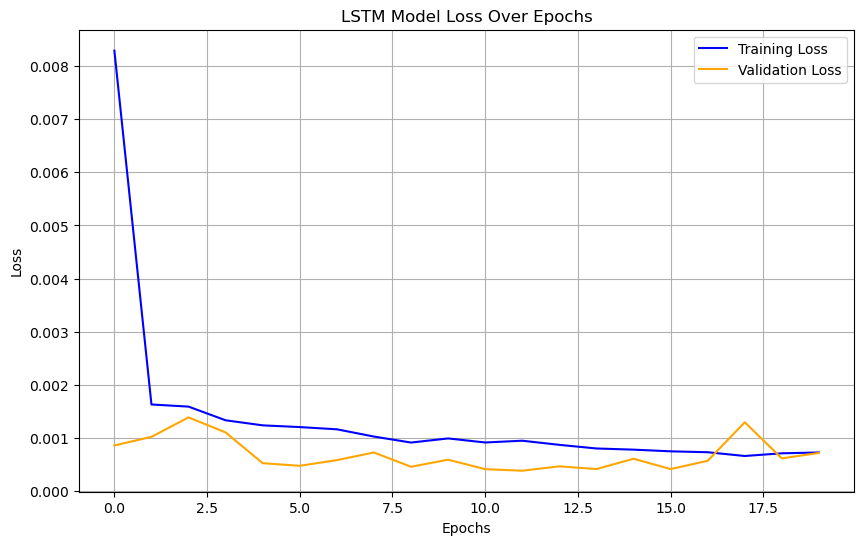

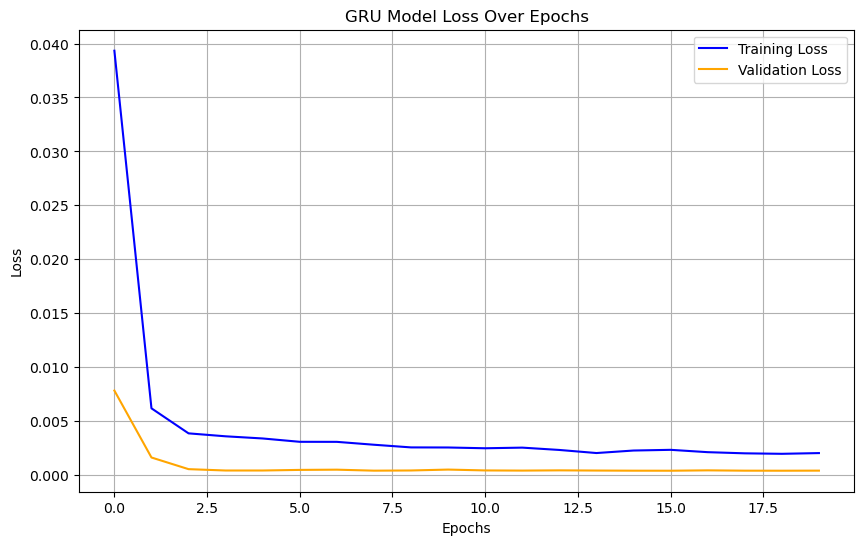

In [114]:
# Plot training and validation loss for all models
def plot_loss(history, title):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss', color='blue')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
    plt.title(f'{title} Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    plt.show()

# Plot losses for RNN, LSTM, and GRU
plot_loss(rnn_his, 'RNN Model')
plot_loss(lstm_his, 'LSTM Model')
plot_loss(gru_his, 'GRU Model')
